In [1]:
#######################
# standard code block #
#######################

%pylab inline
# see https://ipython.readthedocs.io/en/stable/interactive/magics.html

%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


# Introduction to Pandas

## From the Pandas Documentation:
Here are just a few of the things that pandas does well:  
  
* Easy handling of **missing data** (represented as NaN) in floating point as well as non-floating point data  
* Size mutability: columns can be **inserted and deleted** from DataFrame and higher dimensional objects  
* Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations  
* Powerful, flexible **groupby** functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Make it **easy to convert** ragged, differently-index data in other Python and Numpy data structures into DataFrame objects  
* Intelligent **label-based slicing, fancy indexing**, and **subsetting** of large data sets
* Intuitive **merging** and **joining** of data sets  
* Flexible **reshaping** and **pivoting** of data sets  
* **Hierarchical labeling** of axes (possible to have multiple labels per tick)
* **Robust IO tools** for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format  
* **Time series**-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

## 10 Minutes Intro to Pandas  
  
Pandas has an official 10 minute intro.  
  
http://pandas.pydata.org/pandas-docs/stable/10min.html

# Set up Pandas Default Parameters

In [2]:
# imports a library 'pandas', names it as 'pd'
# this is a common convention
import pandas as pd
import numpy as np

In [3]:
# if you run into trouble, it's often helpful to know which version
# you're on
print(f"Pandas Version:\n{pd.__version__}")
print(f'Numpy version:\n{np.__version__}')

Pandas Version:
0.24.2
Numpy version:
1.16.4


In [4]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

# Data Structures

## 1. Series  
  
One Dimensional Array / Vector of Values (Think these as your data columns). One import aspect of them is that they carry an 'index' (which you can think of as a row indicator).

## 2. DataFrames  
 
Think of DataFrame as a **Table with Columns**.  
This is the workhorse of everything you will do with data analysis. Learning `Pandas` and it's functions can be challenging, but stick with it and **ask questions**. Structurally, a DataFrame can be thought of as a **collection of Series objects** with the **same index**.

## 3. [Panel Data]  
  
Three Dimensional Arrays (Mentioned for reference, but we will not get much into these)

# So, What is a Pandas DataFrame?

In [5]:
pd.Series?
pd.Series

pandas.core.series.Series

In [6]:
## Make a Series
s = pd.Series([1,3,5,np.nan,6,8])  # Data passed in as a list
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
pd.DataFrame?

In [8]:
## Make a dataframe from a numpy array
df1 = pd.DataFrame(np.random.randn(6,4), columns=list('ABCD'))
df1

,A,B,C,D
0,0.484,-0.502,0.964,-0.710
1,0.607,-0.541,0.135,-0.481
2,1.102,-0.665,1.827,0.900
3,0.795,-0.258,-1.043,-0.589
4,-1.025,0.124,0.445,1.147
5,1.401,-0.445,0.263,0.031


In [9]:
## Make a dataframe from a dictionary
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)),dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(['test','train','test','train']),
    'F': 'foo'
})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


# Load a Data Set  
  
## "Census Income" Dataset  
  
http://archive.ics.uci.edu/ml/  
pandas can load a lot more than `csv`'s, this tutorial shows how pandas can read excel, sql, and even copy and paste  
http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

In [10]:
# Downloads the data and reads the columns

cols = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
    'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
    'income'
]

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
           names=cols)

# Q: What's happening in the above cell?

We are running a code to read the data from a CSV file and also 
giving column names to the read data

# Viewing Data  
  
* `info()`
* `.head()`
* `.tail()`
* `.columns`
* `.values`
* `dtype`

## info  
  
Displays the **Columns**, **Types**, **Rows** and the memory used by the dataframe

In [13]:
# We can see that there are no null values
# columns with numerical values are type int64, no need to set data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## head  
  
Displays the first few rows in the dataframe

In [14]:
# view the first 5 rows or specified with parameter. eg. .head(10)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## tail  
  
Displays the last few rows in the df

In [15]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# .select_dtypes
  
Displays columns based on the column's datatype  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

In [16]:
df.select_dtypes('int64').head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [17]:
df.select_dtypes(exclude='int64').head()

,workclass,education,marital_status,occupation,relationship,ethnicity,gender,country_of_origin,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


## sample  
  
Dsiplays a sample of rows in the dataframe

In [18]:
# head and tail are good. But sometimes we want to randomly sample data
df.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
2207,35,Private,47707,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Female,0,0,40,United-States,<=50K
23884,42,Private,296982,Some-college,10,Divorced,Sales,Unmarried,White,Male,0,0,40,United-States,<=50K
27763,24,Private,155066,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,60,United-States,<=50K
5497,53,Federal-gov,276868,Masters,14,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
12179,24,Private,117959,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,4386,0,40,United-States,>50K


## Q: What do you expect to happen when you re-run the cell?  
  
What actually happens? Why?

A new set of rows is expected. However, because the random_state is set at 42, we will always return the same rows every single time when the code is run.

In [19]:
df.sample(5, random_state=42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K


## Columns  
  
Returns a list of columns in the dataframe

In [20]:
# view all columns of the dataframe
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
       'income'],
      dtype='object')

## Column Types  
  
Returns the type of each column

In [21]:
df.dtypes

age                   int64
workclass            object
fnlwgt                int64
education            object
education_num         int64
marital_status       object
occupation           object
relationship         object
ethnicity            object
gender               object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
country_of_origin    object
income               object
dtype: object

## Rename Columns

In [22]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
       'income'],
      dtype='object')

In [23]:
# replace a column name
df.rename(columns={'country_of_origin': 'native_country'}, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Q: What does `in_place` do above?

It sets the correction to the original dataframe

#  Descriptives  
* `describe()`
* `value_counts()`
* `.mean()`
* `.unqiue()`

### describe  
  
Displays summary statistic for each numerical column

In [12]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000,3.256e+04,32561.000,32561.000,32561.000,32561.000
mean,38.582,1.898e+05,10.081,1077.649,87.304,40.437
std,13.640,1.055e+05,2.573,7385.292,402.960,12.347
min,17.000,1.228e+04,1.000,0.000,0.000,1.000
25%,28.000,1.178e+05,9.000,0.000,0.000,40.000
50%,37.000,1.784e+05,10.000,0.000,0.000,40.000
75%,48.000,2.371e+05,12.000,0.000,0.000,45.000
max,90.000,1.485e+06,16.000,99999.000,4356.000,99.000


### value_counts  
  
Counts the number of occurences of each categorical value for the column  
Only works on Series

In [24]:
print(type(df['education']))

<class 'pandas.core.series.Series'>


In [25]:
df['education'].value_counts()

## value_counts() also works for numeric columns 
## treats the individual values as factors

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [26]:
type(df.education.value_counts())

pandas.core.series.Series

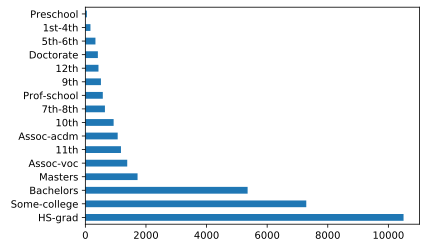

In [27]:
df.education.value_counts().plot('barh')

In [28]:
df['hours_per_week'].mean()

40.437455852092995

## Q: What do you think we will get if we ask for the type of df.hours_per_week?

In [29]:
type(df['hours_per_week'])

pandas.core.series.Series

I honestly thought it'd be a float. But it is a Series instead.

### Unique  
  
Returns the unique values for the column

In [30]:
# there's a space before each string in this data
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [31]:
# Looks like it's in every object column
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [32]:
# Let's check for the reason. This might be why you couldn't do
# Conditional selection on the country_of_origin column

df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [33]:
df['education'] = df['education'].str.strip()

In [37]:
# Hurray! We removed the leading space
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [38]:
df['gender'].unique()

array([' Male', ' Female'], dtype=object)

In [40]:
# Remove the leading spaces for gender

df['gender'] = df['gender'].str.strip()
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [41]:
df['native_country'] = df['native_country'].str.strip()
df['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

# Selecting Rows and Columns
  
## .loc
* Selects row and columns by **Names**
* **by label** .loc[]
## .iloc  
* Selects rows and columns by **Index Position**
* **by integer position** .iloc[ ]
  
http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [46]:
# select a row
df.iloc[3]

age                                53
workclass                     Private
fnlwgt                         234721
education                        11th
education_num                       7
marital_status     Married-civ-spouse
occupation          Handlers-cleaners
relationship                  Husband
ethnicity                       Black
gender                           Male
capital_gain                        0
capital_loss                        0
hours_per_week                     40
native_country          United-States
income                          <=50K
Name: 3, dtype: object

In [48]:
df.iloc[0:3]

## Note: I got 3 rows returned, similar to the indexing that applies
## to Python lists

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [54]:
# select a range of rows
df.iloc[10:15]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


In [55]:
# Selecting last 2 rows
df.iloc[-2:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [56]:
# Selecting every other row in columns 3-5
df.iloc[::2, 2:5].head()

,fnlwgt,education,education_num
0,77516,Bachelors,13
2,215646,HS-grad,9
4,338409,Bachelors,13
6,160187,9th,5
8,45781,Masters,14


In [58]:
# select a row (not via indexing. this is via the label)
df.loc[0:3]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


# Q: Why did I get 4 rows here instead of 3?  
  
Integers vs labels!

In [59]:
(df.loc[0:2, 'age'])

0    39
1    50
2    38
Name: age, dtype: int64

In [61]:
asd = df[df['age'] > 50].head()
asd

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K


In [62]:
# Filter for only certain Columns
df.loc[df['age'] > 50, ['age', 'education', 'occupation', 'gender',
                       'income']]

# What happens if I try to do the same with df.iloc instead of df.loc?

,age,education,occupation,gender,income
3,53,11th,Handlers-cleaners,Male,<=50K
7,52,HS-grad,Exec-managerial,Male,>50K
21,54,HS-grad,Other-service,Female,<=50K
24,59,HS-grad,Tech-support,Female,<=50K
25,56,Bachelors,Tech-support,Male,>50K
27,54,Some-college,?,Male,>50K
41,53,Bachelors,Prof-specialty,Male,<=50K
45,57,Bachelors,Prof-specialty,Male,>50K
46,53,HS-grad,Machine-op-inspct,Male,<=50K
67,53,HS-grad,Adm-clerical,Female,>50K


In [69]:
df.iloc[df.iloc[:,0] > 50, 0]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [70]:
df[df['age']>50].head(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K


# Now filter on Gender

In [71]:
df['gender'] == 'Male'

0         True
1         True
2         True
3         True
4        False
5        False
6        False
7         True
8        False
9         True
10        True
11        True
         ...  
32549    False
32550     True
32551     True
32552     True
32553     True
32554     True
32555     True
32556    False
32557     True
32558    False
32559     True
32560    False
Name: gender, Length: 32561, dtype: bool

In [75]:
df.loc[df['gender']=='Male'].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


## Now Filter on Gender and Age between 30 and 40

In [78]:
(df['gender'] == 'Male') & (df['age'] > 30) & (df['age'] < 40)

0         True
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10        True
11       False
         ...  
32549    False
32550    False
32551     True
32552    False
32553     True
32554    False
32555    False
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [80]:
df.loc[(df['gender'] == 'Male') & (df['age'] > 30) & (df['age'] < 40)].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K


## Find Nulls

as we saw with df.info() there are no nulls.  
but if there were this would find the rows where age is null

In [82]:
df[df['age'].isnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income


## Fill Nulls

In [85]:
null_df = pd.DataFrame(data=[1,2,3,4,np.nan], columns=['column1'])
null_df

,column1
0,1.0
1,2.0
2,3.0
3,4.0
4,NaN


In [86]:
# you can also fill nulls with a value or string
null_df['column1'].fillna(1000)

0       1.0
1       2.0
2       3.0
3       4.0
4    1000.0
Name: column1, dtype: float64

`.fillna` does not do in_place unless specified

In [87]:
null_df

,column1
0,1.0
1,2.0
2,3.0
3,4.0
4,NaN


In [94]:
null_df['column1'].fillna(null_df['column1'].median(), inplace=True)
null_df

,column1
0,1.0
1,2.0
2,3.0
3,4.0
4,2.5


In [98]:
null_df.loc[5] = np.nan
null_df

,column1
0,1.0
1,2.0
2,3.0
3,4.0
4,2.5
5,NaN


In [99]:
null_df.fillna('random_string')

,column1
0,1
1,2
2,3
3,4
4,2.5
5,random_string


## Drop Nulls

In [100]:
null_df = pd.DataFrame([1, 2, 4, np.nan], columns=['column1'])
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [101]:
null_df.dropna(how = 'any')

,column1
0,1.0
1,2.0
2,4.0


In [102]:
# .isnull() and .notnull() do opposite things
null_df.isnull()

,column1
0,False
1,False
2,False
3,True


In [103]:
null_df.notnull()

,column1
0,True
1,True
2,True
3,False


## Groupby

In [106]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [108]:
df.groupby('relationship').count()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
relationship,,,,,,,,,,,,,,
Husband,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193
Not-in-family,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305
Other-relative,981,981,981,981,981,981,981,981,981,981,981,981,981,981
Own-child,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068
Unmarried,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446
Wife,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568


In [112]:
# How to groupby column and apply a function like sum, count or mean
df.groupby(['education']).mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
education,,,,,,
10th,37.430,196832.465,6.0,404.574,56.846,37.053
11th,32.356,194928.077,7.0,215.098,50.079,33.926
12th,32.000,199097.508,8.0,284.088,32.337,35.781
1st-4th,46.143,239303.000,2.0,125.875,48.327,38.256
5th-6th,42.886,232448.333,3.0,176.021,68.252,38.898
7th-8th,48.446,188079.172,4.0,233.940,65.669,39.367
9th,41.060,202485.066,5.0,342.089,28.998,38.045
Assoc-acdm,37.381,193424.094,12.0,640.399,93.419,40.504
Assoc-voc,38.554,181936.017,11.0,715.051,72.755,41.611


In [114]:
df.groupby(['education',
           'age'])[['hours_per_week','capital_gain']].mean()

hours_per_week  capital_gain
education    age                              
10th         17           21.543       266.659
             18           27.895         0.000
             19           34.500         0.000
             20           39.400         0.000
             21           39.000       229.882
             22           37.053         0.000
             23           42.588         0.000
             24           41.889         0.000
             25           38.714       123.667
             26           42.706       171.000
             27           46.059         0.000
             28           39.914         0.000
...                          ...           ...
Some-college 74           19.727      1822.818
             75           23.750         0.000
             76           23.714         0.000
             77           22.143         0.000
             78            3.000         0.000
             79           20.000         0.000
             80           40.000         0.000
             81           13.000         0.000
             82           11.500         0.000
             84           35.000         0.000
             88           40.000         0.000
             90           32.833         0.000

[965 rows x 2 columns]

# .agg() function

In [115]:
# To groupby multiple columns with multiple functions attached
df.groupby(['income','native_country'])['age'].agg(['count','mean'])
# grouped in order of which column is listed first

count    mean
income native_country                   
 <=50K ?                     437  36.854
       Cambodia               12  35.667
       Canada                 82  41.012
       China                  55  41.800
       Columbia               57  39.228
       Cuba                   70  47.286
       Dominican-Republic     68  37.941
       Ecuador                24  34.833
       El-Salvador            97  32.649
       England                60  38.967
       France                 17  38.118
       Germany                93  36.817
...                          ...     ...
 >50K  Philippines            61  42.738
       Poland                 12  50.583
       Portugal                4  40.000
       Puerto-Rico            12  46.500
       Scotland                3  52.667
       South                  16  44.875
       Taiwan                 20  40.800
       Thailand                3  32.667
       Trinadad&Tobago         2  42.500
       United-States        7171  44.297
       Vietnam                 5  35.400
       Yugoslavia              6  40.167

[82 rows x 2 columns]

In [116]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [119]:
# can use the aggs function to aggregate columns separately
gb = df.groupby(['income','native_country'])
gb_aggs = gb.agg({'age': 'mean', 'capital_gain':'sum'})
gb_aggs

age  capital_gain
income native_country                          
 <=50K ?                   36.854         49712
       Cambodia            35.667          5979
       Canada              41.012          9077
       China               41.800          5714
       Columbia            39.228         10656
       Cuba                47.286          9589
       Dominican-Republic  37.941          3325
       Ecuador             34.833          5387
       El-Salvador         32.649         18505
       England             38.967         12494
       France              38.118          2463
       Germany             36.817         13773
...                           ...           ...
 >50K  Philippines         42.738        198803
       Poland              50.583         32917
       Portugal            40.000             0
       Puerto-Rico         46.500         27594
       Scotland            52.667          5178
       South               44.875        145071
       Taiwan              40.800        107297
       Thailand            32.667             0
       Trinadad&Tobago     42.500             0
       United-States       44.297      28449414
       Vietnam             35.400         29368
       Yugoslavia          40.167          5556

[82 rows x 2 columns]

In [121]:
# combine groupby with boolean
df[df['native_country'] == 'United-States'].groupby(['education'])['hours_per_week'].mean()

education
10th            36.915
11th            33.682
12th            34.951
1st-4th         32.913
5th-6th         36.979
7th-8th         39.060
9th             38.035
Assoc-acdm      40.657
Assoc-voc       41.633
Bachelors       42.709
Doctorate       47.409
HS-grad         40.596
Masters         44.169
Preschool       28.118
Prof-school     47.484
Some-college    38.862
Name: hours_per_week, dtype: float64

# Sort  
  
* `###` sort_index() to sort by index
* `###` sort_values() to sort by values

In [128]:
# groupby income and country
# and then sort by their mean age within each data block
df_grouped = df.groupby(['income','native_country']).mean().sort_values(by='age',ascending=True)
df_grouped

# Note: In this example, the groupby, mean, and sort functions are stringed together in one line
# in the next example, we will show a different syntax so that you could write them on separate
# lines to make the code a little easier to read

age      fnlwgt  education_num  capital_gain  \
income native_country                                                        
 <=50K Taiwan              29.323  181981.290         12.548        71.032   
 >50K  Dominican-Republic  30.500  220226.000          9.000     49999.500   
       Hong                31.500  294478.833         13.833         0.000   
 <=50K Holand-Netherlands  32.000   27882.000         10.000         0.000   
       Guatemala           32.262  266016.016          5.951       116.148   
       El-Salvador         32.649  264114.124          6.340       190.773   
 >50K  Thailand            32.667  199784.000         12.667         0.000   
 <=50K Honduras            32.750  272571.000          8.167         0.000   
       Mexico              32.902  289038.116          5.959       135.538   
 >50K  Peru                33.500  314562.500         11.500         0.000   
 <=50K Nicaragua           33.594  287987.906          8.656       212.312   
       Laos                33.938  209838.188          8.500       180.312   
...                           ...         ...            ...           ...   
 >50K  Honduras            47.000   51835.000         15.000         0.000   
 <=50K Hungary             47.000  182993.800         10.700       413.800   
       Cuba                47.286  243906.229          9.043       136.986   
 >50K  Ecuador             47.500  169428.750         10.500      2346.500   
       Haiti               48.000  206832.500          9.500         0.000   
       El-Salvador         50.111  149620.556         12.222      4708.111   
       Greece              50.250  121954.125         11.125      3741.250   
       Italy               50.360  185383.360         10.960      1253.040   
       Poland              50.583  179314.167         11.083      2743.083   
       Scotland            52.667  208306.667         10.667      1726.000   
       Columbia            53.500  283410.500         15.500         0.000   
       Hungary             57.333  172137.333         11.000      1726.000   

                           capital_loss  hours_per_week  
income native_country                                    
 <=50K Taiwan                    51.677          33.774  
 >50K  Dominican-Republic         0.000          47.000  
       Hong                     329.500          45.000  
 <=50K Holand-Netherlands      2205.000          40.000  
       Guatemala                 26.131          39.361  
       El-Salvador               34.000          36.031  
 >50K  Thailand                   0.000          58.333  
 <=50K Honduras                   0.000          34.333  
       Mexico                    22.990          40.003  
 >50K  Peru                     924.000          40.000  
 <=50K Nicaragua                 49.344          36.094  
       Laos                       0.000          40.375  
...                                 ...             ...  
 >50K  Honduras                1902.000          60.000  
 <=50K Hungary                  166.800          31.300  
       Cuba                      19.714          37.986  
 >50K  Ecuador                    0.000          48.750  
       Haiti                      0.000          42.750  
       El-Salvador                0.000          45.000  
       Greece                   539.625          50.625  
       Italy                     79.080          45.400  
       Poland                     0.000          39.000  
       Scotland                   0.000          46.667  
       Columbia                   0.000          50.000  
       Hungary                    0.000          50.000  

[82 rows x 6 columns]

In [133]:
# We want to group people by their income and country
# Then sort them by their income ASCE, and then sort by average age
# within that group DESC

(df
 .groupby(['income','native_country'])
 .mean() 
)

age      fnlwgt  education_num  capital_gain  \
income native_country                                                        
 <=50K ?                   36.854  195354.380         10.039       113.757   
       Cambodia            35.667  167065.667          7.917       498.250   
       Canada              41.012  169279.585         10.244       110.695   
       China               41.800  175689.182         10.309       103.891   
       Columbia            39.228  223105.158          9.158       186.947   
       Cuba                47.286  243906.229          9.043       136.986   
       Dominican-Republic  37.941  191262.015          7.059        48.897   
       Ecuador             34.833  188597.167          9.292       224.458   
       El-Salvador         32.649  264114.124          6.340       190.773   
       England             38.967  185459.400         10.433       208.233   
       France              38.118  205851.588         11.941       144.882   
       Germany             36.817  184968.237         10.462       148.097   
...                           ...         ...            ...           ...   
 >50K  Philippines         42.738  178169.197         12.443      3259.066   
       Poland              50.583  179314.167         11.083      2743.083   
       Portugal            40.000  106998.250         10.750         0.000   
       Puerto-Rico         46.500  221403.333          9.833      2299.500   
       Scotland            52.667  208306.667         10.667      1726.000   
       South               44.875  160641.250         11.688      9066.938   
       Taiwan              40.800  193354.550         14.450      5364.850   
       Thailand            32.667  199784.000         12.667         0.000   
       Trinadad&Tobago     42.500  162096.000          7.000         0.000   
       United-States       44.297  187433.992         11.579      3967.287   
       Vietnam             35.400  141648.400          9.600      5873.600   
       Yugoslavia          40.167  197059.167         10.333       926.000   

                           capital_loss  hours_per_week  
income native_country                                    
 <=50K ?                         62.428          40.165  
       Cambodia                 289.833          41.417  
       Canada                   145.524          37.915  
       China                     94.418          37.382  
       Columbia                  28.105          38.684  
       Cuba                      19.714          37.986  
       Dominican-Republic        25.912          42.338  
       Ecuador                    0.000          38.042  
       El-Salvador               34.000          36.031  
       England                   66.367          40.483  
       France                     0.000          41.059  
       Germany                   11.742          39.140  
...                                 ...             ...  
 >50K  Philippines              196.230          43.033  
       Poland                     0.000          39.000  
       Portugal                   0.000          41.500  
       Puerto-Rico              158.500          39.417  
       Scotland                   0.000          46.667  
       South                    361.312          51.438  
       Taiwan                   314.700          46.800  
       Thailand                   0.000          58.333  
       Trinadad&Tobago          943.500          40.000  
       United-States            194.465          45.505  
       Vietnam                    0.000          39.200  
       Yugoslavia                 0.000          49.500  

[82 rows x 6 columns]

In [134]:
(df
 .groupby(['income','native_country'])
 .mean()
 .reset_index()
)

,income,native_country,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,<=50K,?,36.854,195354.380,10.039,113.757,62.428,40.165
1,<=50K,Cambodia,35.667,167065.667,7.917,498.250,289.833,41.417
2,<=50K,Canada,41.012,169279.585,10.244,110.695,145.524,37.915
3,<=50K,China,41.800,175689.182,10.309,103.891,94.418,37.382
4,<=50K,Columbia,39.228,223105.158,9.158,186.947,28.105,38.684
5,<=50K,Cuba,47.286,243906.229,9.043,136.986,19.714,37.986
6,<=50K,Dominican-Republic,37.941,191262.015,7.059,48.897,25.912,42.338
7,<=50K,Ecuador,34.833,188597.167,9.292,224.458,0.000,38.042
8,<=50K,El-Salvador,32.649,264114.124,6.340,190.773,34.000,36.031
9,<=50K,England,38.967,185459.400,10.433,208.233,66.367,40.483


In [153]:
(df
 .groupby(['income','native_country'])
 .mean()
 .reset_index()
 .sort_values(['income','age'], ascending=[True,False])
)

,income,native_country,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
5,<=50K,Cuba,47.286,243906.229,9.043,136.986,19.714,37.986
18,<=50K,Hungary,47.000,182993.800,10.700,413.800,166.800,31.300
12,<=50K,Greece,44.667,151661.286,9.190,347.762,202.429,41.810
22,<=50K,Italy,44.375,179759.375,7.750,277.375,0.000,39.625
3,<=50K,China,41.800,175689.182,10.309,103.891,94.418,37.382
31,<=50K,Poland,41.250,185051.479,9.854,169.583,42.729,38.167
38,<=50K,Trinadad&Tobago,41.176,218778.941,8.412,0.000,137.588,37.059
2,<=50K,Canada,41.012,169279.585,10.244,110.695,145.524,37.915
32,<=50K,Portugal,40.333,153666.939,6.212,256.061,0.000,41.939
33,<=50K,Puerto-Rico,39.804,200316.010,8.108,83.980,43.078,38.471


In [154]:
(df
 .groupby(['income','native_country'])
 .mean()
 .reset_index()
 .sort_values(['income','age'], ascending=[True,False]) 
)

## Note: In this example, we sort by a SAME COLUMN which 
## we grouped by earlier

# (eg. we first groupby "income" and then sort by 'income')

# In ths case, we must use .reset_index() to re-index the groupby objs
# because the 'income' column no longer exists after groupby
# and hence cannot be sorted directly

# under .sort_values(['col1','col2', ascending=[for col1, for col2]])

,income,native_country,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
5,<=50K,Cuba,47.286,243906.229,9.043,136.986,19.714,37.986
18,<=50K,Hungary,47.000,182993.800,10.700,413.800,166.800,31.300
12,<=50K,Greece,44.667,151661.286,9.190,347.762,202.429,41.810
22,<=50K,Italy,44.375,179759.375,7.750,277.375,0.000,39.625
3,<=50K,China,41.800,175689.182,10.309,103.891,94.418,37.382
31,<=50K,Poland,41.250,185051.479,9.854,169.583,42.729,38.167
38,<=50K,Trinadad&Tobago,41.176,218778.941,8.412,0.000,137.588,37.059
2,<=50K,Canada,41.012,169279.585,10.244,110.695,145.524,37.915
32,<=50K,Portugal,40.333,153666.939,6.212,256.061,0.000,41.939
33,<=50K,Puerto-Rico,39.804,200316.010,8.108,83.980,43.078,38.471
